In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('survey_results_public.csv')
df.head()


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [44]:
df = df[['Country','EdLevel','YearsCode','Employment','ConvertedComp']]
df = df.rename({'ConvertedComp': 'Salary'},axis=1)
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",36,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,Employed full-time,NaN
2,Russian Federation,NaN,4,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",15,Employed full-time,NaN


In [45]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",35,Employed full-time,38916.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     34756 non-null  object 
 1   EdLevel     34188 non-null  object 
 2   YearsCode   34630 non-null  object 
 3   Employment  34717 non-null  object 
 4   Salary      34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [47]:
df = df.dropna()
df.isnull().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [48]:
df = df[df['Employment']== 'Employed full-time']
df = df.drop('Employment', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30024 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30024 non-null  object 
 1   EdLevel    30024 non-null  object 
 2   YearsCode  30024 non-null  object 
 3   Salary     30024 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [49]:
df['Country'].value_counts()

Country
United States     7565
India             2432
United Kingdom    2289
Germany           1903
Canada            1180
                  ... 
Swaziland            1
Niger                1
Belize               1
Yemen                1
Andorra              1
Name: count, Length: 154, dtype: int64

In [50]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map

In [51]:
Country_map = shorten_categories(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(Country_map)
df.Country.value_counts()

Country
other                 8552
United States         7565
India                 2432
United Kingdom        2289
Germany               1903
Canada                1180
Brazil                 990
France                 970
Spain                  668
Australia              658
Netherlands            655
Poland                 567
Italy                  560
Russian Federation     521
Sweden                 514
Name: count, dtype: int64

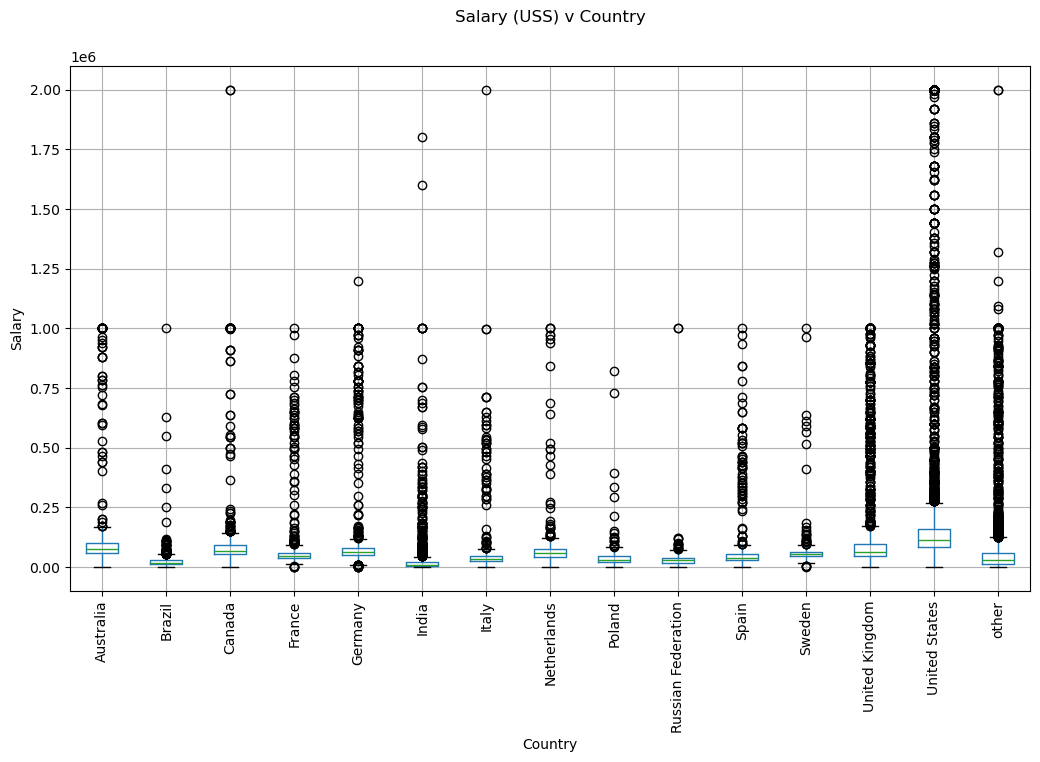

In [52]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USS) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


In [53]:
df = df[(df['Salary'] >= 10000) & (df['Salary'] <=250000)]
df = df[df['Country'] != 'other']
df

,Country,EdLevel,YearsCode,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",8,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,40070.0
11,Spain,Some college/university study without earning ...,7,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",35,38916.0
...,...,...,...,...
64116,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,150000.0
64122,United States,"Associate degree (A.A., A.S., etc.)",6,70000.0
64123,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37,67215.0
64127,United States,"Other doctoral degree (Ph.D., Ed.D., etc.)",15,140000.0


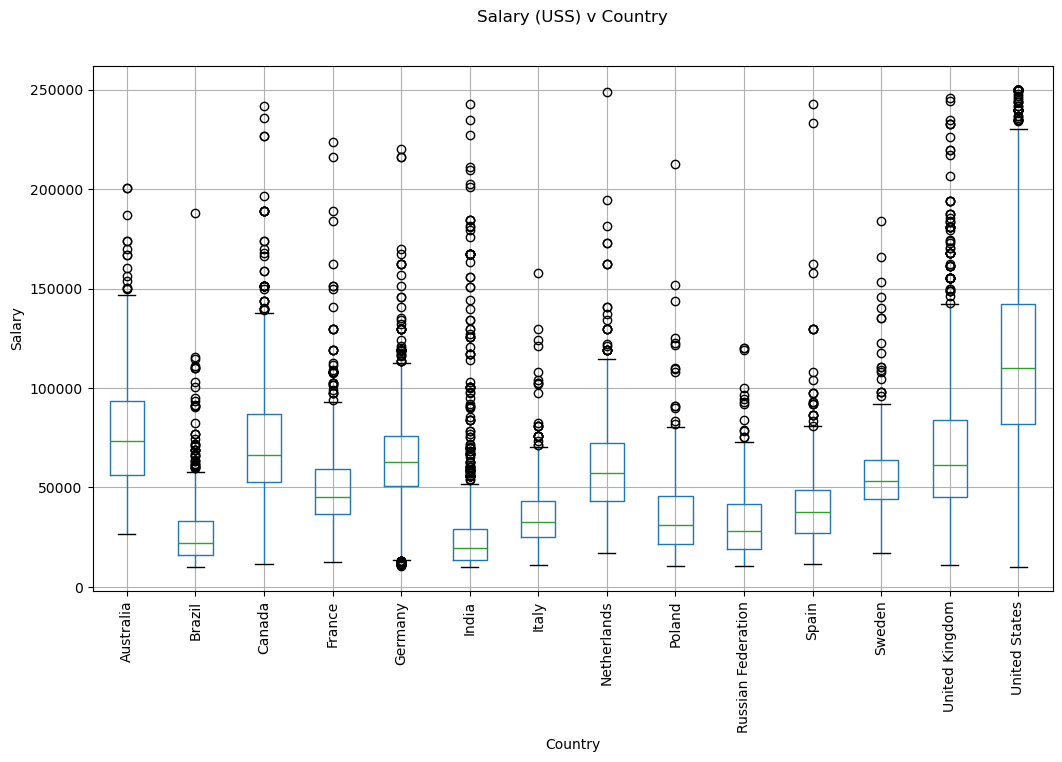

In [54]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (USS) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [55]:
df['YearsCode'].unique()

array(['17', '8', '10', '7', '35', '5', '9', '30', '4', '19', '20', '25',
       '16', '36', '6', '43', '23', '11', '38', '24', '21', '37', '40',
       '15', '27', '12', '13', '3', '33', '22', '18', '14', '32', '44',
       '26', '42', '2', '28', '31', '29', '1', '41', '47', '34',
       'More than 50 years', '39', '46', '45', 'Less than 1 year', '50',
       '49', '48'], dtype=object)

In [56]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCode'] = df['YearsCode'].apply(clean_experience)
df['YearsCode'].unique()

array([17. ,  8. , 10. ,  7. , 35. ,  5. ,  9. , 30. ,  4. , 19. , 20. ,
       25. , 16. , 36. ,  6. , 43. , 23. , 11. , 38. , 24. , 21. , 37. ,
       40. , 15. , 27. , 12. , 13. ,  3. , 33. , 22. , 18. , 14. , 32. ,
       44. , 26. , 42. ,  2. , 28. , 31. , 29. ,  1. , 41. , 47. , 34. ,
       50. , 39. , 46. , 45. ,  0.5, 49. , 48. ])

In [57]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [58]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if "Master’s degree" in x:
        return "Master’s degree"
    if 'Professional degree' in x or 'other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [59]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 2, 1, 3])

In [61]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [62]:
X = df.drop('Salary',axis=1)
y = df['Salary']

In [63]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [64]:
y_pred = linear_reg.predict(X)

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y,y_pred))

In [66]:
error

np.float64(39582.698959784124)

In [67]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [68]:
y_pred = dec_tree_reg.predict(X)

In [69]:
error = np.sqrt(mean_squared_error(y,y_pred))
print('${:,.02f}'.format(error))

$30,542.86


In [70]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [71]:
y_pred = random_forest_reg.predict(X)

In [72]:
error = np.sqrt(mean_squared_error(y,y_pred))
print('${:,.02f}'.format(error))

$30,589.22


In [73]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [74]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print('${:,.02f}'.format(error))

$31,349.53


In [75]:
X

,Country,EdLevel,YearsCode
7,13,0,17.0
9,12,2,8.0
10,12,0,10.0
11,10,1,7.0
12,7,1,35.0
...,...,...,...
64116,13,0,10.0
64122,13,1,6.0
64123,12,2,37.0
64127,13,1,15.0


In [76]:
#country,edlevel, yearcode

X = np.array([['United States', 'Master’s degree',15]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U21')

In [77]:
X[:, 0] = le_country.transform(X[:, 0])
X[:, 1] = le_education.transform(X[:, 1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [78]:
y_pred = regressor.predict(X)
y_pred

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([125580.06666667])

In [79]:
import joblib

In [80]:
data = {'model':regressor, 'le_country':le_country, 'le_education':le_education}

joblib.dump(data,'data.joblib')

['data.joblib']

In [81]:
data = joblib.load('data.joblib')

    
regressor_loaded = data['model']
le_country = data['le_country']
le_education = data['le_education']

In [82]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([125580.06666667])